## Discretization
Data discretization is a preprocessing technique used to transform continuous or numerical data into discrete categories or bins. This process can be particularly useful for machine learning algorithms that handle categorical data more effectively than continuous data. It can also help to improve model interpretability and handle outliers more robustly.

## 1.import libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

## 2.Load Dataset

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Impute Missing values

In [3]:
df['age']=df['age'].fillna(df['age'].median())
df['fare']=df['fare'].fillna(df['fare'].median())

## 4. Plot age

<Axes: xlabel='age', ylabel='Count'>

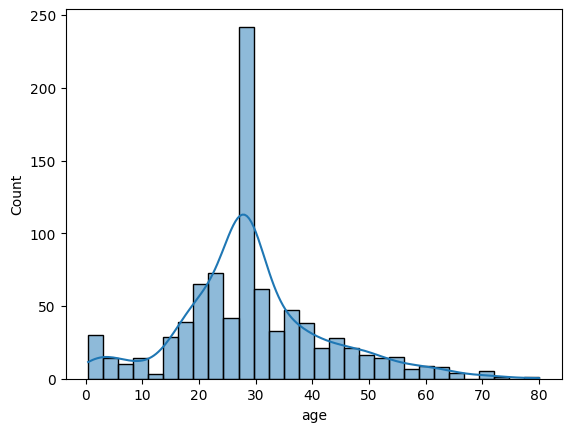

In [4]:
sns.histplot(df['age'], kde=True)

## Method 1: Using scikit-learn (KBinsDiscretizer)

## 5. Make 3 bins

In [5]:
ageDiscretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_bin'] = ageDiscretizer.fit_transform(df[['age']])

<Axes: xlabel='age', ylabel='Count'>

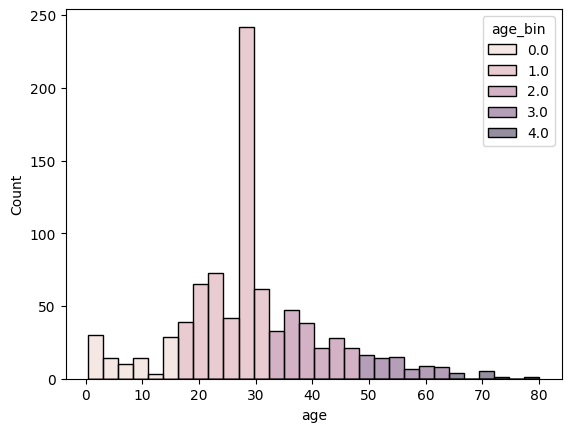

In [8]:
sns.histplot(df, x='age', hue='age_bin')

## Method 2: Manual Binning with Pandas

## A) Automatic 3 equal bins

<Axes: xlabel='age', ylabel='Count'>

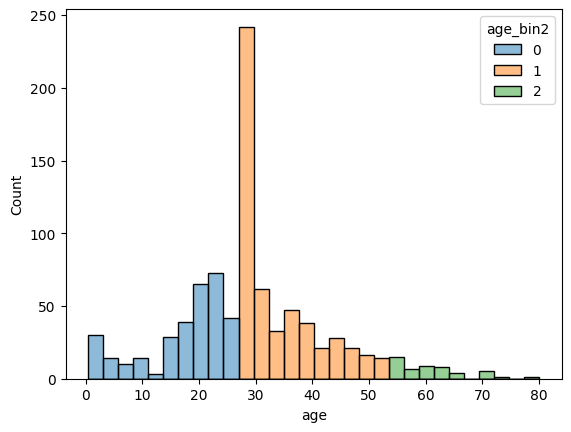

In [13]:
df['age_bin2'] = pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df, x='age', hue = 'age_bin2')


## B) Custom bins

<Axes: xlabel='age', ylabel='Count'>

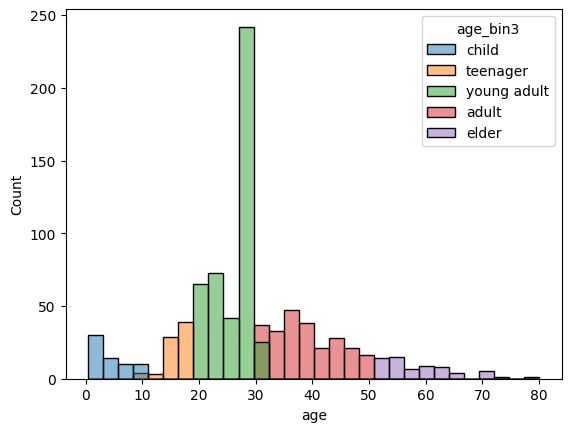

In [14]:
# define the bins
bins = [0, 10, 18, 30, 50, 80]
labels = ['child', 'teenager', 'young adult', 'adult', 'elder']
df['age_bin3'] = pd.cut(df['age'], bins=bins, labels=labels)
sns.histplot(df, x='age', hue = 'age_bin3')